<a href="https://colab.research.google.com/github/anushreesinghal6/SE20UARI178_CSA/blob/main/SE20UARI178_SCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

In [ ]:

df = pd.read_csv('Traindata.csv')
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17-01-2011,8091,216418,99.0375,111.8625,0,0,20
1,2,17-01-2011,8091,216419,99.0375,99.0375,0,0,28
2,3,17-01-2011,8091,216425,133.9500,133.9500,0,0,19
3,4,17-01-2011,8091,216233,133.9500,133.9500,0,0,44
4,5,17-01-2011,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09-07-2013,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09-07-2013,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09-07-2013,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09-07-2013,9984,547934,141.7875,191.6625,0,1,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


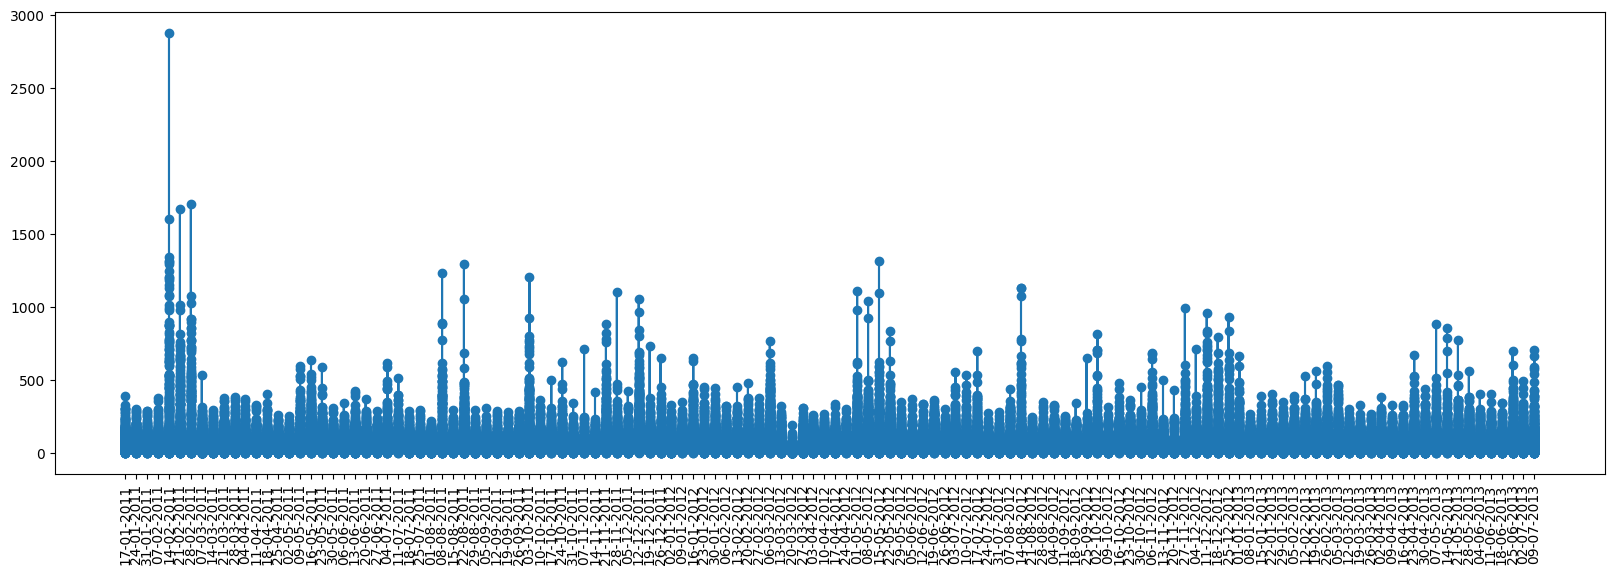

In [ ]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Plot the two columns
plt.figure(figsize=(20, 6))  # Setting the figure size
plt.plot(df['week'], df['units_sold'], marker='o')  # 'o' adds circle markers
plt.xticks(rotation=90)

# Display the plot
plt.show()



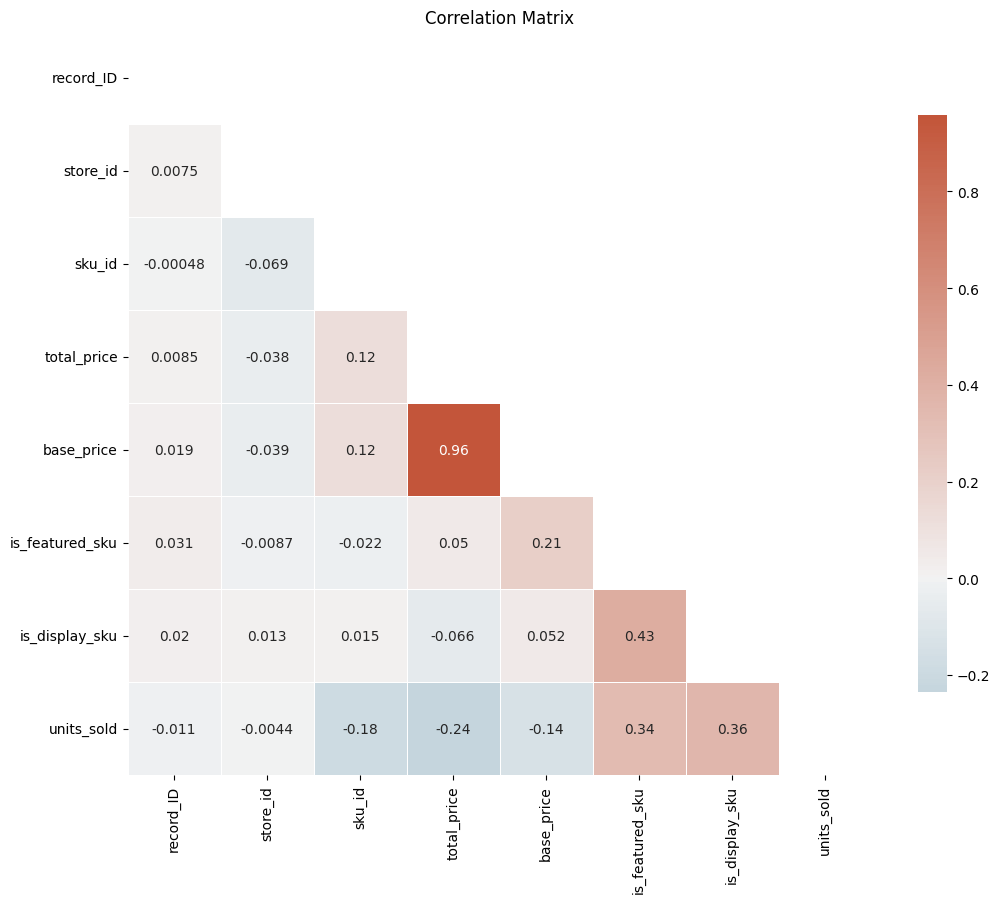

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame 'df'
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot heatmap
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.75}, annot=True)

plt.title('Correlation Matrix')
plt.show()


In [ ]:

df.drop(columns='record_ID', inplace=True)

In [ ]:
print(df.columns)

Index(['week', 'store_id', 'sku_id', 'total_price', 'base_price',
       'is_featured_sku', 'is_display_sku', 'units_sold'],
      dtype='object')


In [ ]:

df.drop(columns='store_id', inplace=True)


In [ ]:
df.head()

,week,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,17-01-2011,216418,99.0375,111.8625,0,0,20
1,17-01-2011,216419,99.0375,99.0375,0,0,28
2,17-01-2011,216425,133.9500,133.9500,0,0,19
3,17-01-2011,216233,133.9500,133.9500,0,0,44
4,17-01-2011,217390,141.0750,141.0750,0,0,52


In [ ]:

df.drop(columns='sku_id', inplace=True)

In [ ]:

df.head()

,week,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,17-01-2011,99.0375,111.8625,0,0,20
1,17-01-2011,99.0375,99.0375,0,0,28
2,17-01-2011,133.9500,133.9500,0,0,19
3,17-01-2011,133.9500,133.9500,0,0,44
4,17-01-2011,141.0750,141.0750,0,0,52


In [ ]:

df['date'] = pd.to_datetime(df['week'])
df.set_index('date', inplace=True)

<ipython-input-12-417e876065f7>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['week'])


In [ ]:

df.drop(columns='week', inplace=True)


In [ ]:

df.head()

,total_price,base_price,is_featured_sku,is_display_sku,units_sold
date,,,,,
2011-01-17,99.0375,111.8625,0,0,20
2011-01-17,99.0375,99.0375,0,0,28
2011-01-17,133.9500,133.9500,0,0,19
2011-01-17,133.9500,133.9500,0,0,44
2011-01-17,141.0750,141.0750,0,0,52


In [ ]:

df.drop(columns='total_price', inplace=True)

df.drop(columns='base_price', inplace=True)

df.drop(columns='is_featured_sku', inplace=True)
df.drop(columns='is_display_sku', inplace=True)

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming df['sold_items'] is your time series data
model = ExponentialSmoothing(df['units_sold'], trend='add', seasonal='mul', seasonal_periods=12)
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:

forecast_values = model_fit.forecast(steps=13860)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:

print(forecast_values)

150150    50.975977
150151    51.850841
150152    81.835829
150153    57.771869
150154    56.365621
            ...    
164005    48.548952
164006    44.958353
164007    46.649879
164008    52.584642
164009    51.613510
Length: 13860, dtype: float64


In [ ]:


df2 = pd.read_csv('submission format.csv')

In [ ]:
df2

,record_ID,units_sold
0,212645,0
1,212646,0
2,212647,0
3,212648,0
4,212649,0
...,...,...
13855,232281,0
13856,232282,0
13857,232285,0
13858,232286,0


In [ ]:

df2['forecasted_column_name'] = np.nan

In [ ]:

df2 = df2.assign(forecasted_column_name=pd.Series(forecast_values).values)


In [ ]:

df2

,record_ID,units_sold,forecasted_column_name
0,212645,0,50.975977
1,212646,0,51.850841
2,212647,0,81.835829
3,212648,0,57.771869
4,212649,0,56.365621
...,...,...,...
13855,232281,0,48.548952
13856,232282,0,44.958353
13857,232285,0,46.649879
13858,232286,0,52.584642


In [ ]:

df2.drop(columns='units_sold', inplace=True)
df2 = df2.rename(columns={'forecasted_column_name': 'units sold'})

df2

,record_ID,units sold
0,212645,50.975977
1,212646,51.850841
2,212647,81.835829
3,212648,57.771869
4,212649,56.365621
...,...,...
13855,232281,48.548952
13856,232282,44.958353
13857,232285,46.649879
13858,232286,52.584642


In [ ]:

df2['units sold'] = df2['units sold'].astype(int)


In [ ]:

df2

,record_ID,units sold
0,212645,50.975977
1,212646,51.850841
2,212647,81.835829
3,212648,57.771869
4,212649,56.365621
...,...,...
13855,232281,48.548952
13856,232282,44.958353
13857,232285,46.649879
13858,232286,52.584642


In [ ]:

df2.to_csv('submission format final.csv', index=False)